Clone DIVACoast repo and change working directory

In [ ]:
run(`git clone https://github.com/GlobalClimateForum/DIVACoast.jl.git`)
cd("DIVACoast.jl/test") 
pwd()

Load DIVACoast package

In [ ]:
#include("../src/DIVACoast.jl") #if used in VSCode
include("DIVACoast_test.jl") #for Google Colab notebook!
using .DIVACoast
using Printf
using Plots

Base.show(io::IO, f::Float64) = @printf(io, "%.2f", f)
Base.show(io::IO, f::Float32) = @printf(io, "%.2f", f)
cd(@__DIR__)

  Activating project at `c:\Users\voelz\Documents\DIVA\DIVACoast`


┌                                       ┐
│ DIVACoast.jl | © GLOBAL CLIMATE FORUM │
└                                       ┘


Load the hypsometric profiles for each segment in the UK and Ireland 

(They are precomputed and saved in the file "UKIRL_hspfs_floodplains.nc")

In [2]:
hspfs = load_hsps_nc(Int32, Float32, "../testdata/UKIRL/nc/UKIRL_hspfs_floodplains.nc")

Dict{Int32, HypsometricProfile{Float32}} with 2733 entries:
  2288 => HypsometricProfile{Float32}(1.30, "km", Float32[-5.00, -4.90, -4.80, …
  1703 => HypsometricProfile{Float32}(0.54, "km", Float32[-5.00, -4.90, -4.80, …
  1956 => HypsometricProfile{Float32}(1.07, "km", Float32[-5.00, -4.90, -4.80, …
  2350 => HypsometricProfile{Float32}(6.40, "km", Float32[-5.00, -4.90, -4.80, …
  687  => HypsometricProfile{Float32}(3.13, "km", Float32[-5.00, -4.90, -4.80, …
  2015 => HypsometricProfile{Float32}(10.53, "km", Float32[-5.00, -4.90, -4.80,…
  185  => HypsometricProfile{Float32}(0.61, "km", Float32[-5.00, -4.90, -4.80, …
  1090 => HypsometricProfile{Float32}(2.55, "km", Float32[-5.00, -4.90, -4.80, …
  1704 => HypsometricProfile{Float32}(0.86, "km", Float32[-5.00, -4.90, -4.80, …
  422  => HypsometricProfile{Float32}(1.07, "km", Float32[-5.00, -4.90, -4.80, …
  1266 => HypsometricProfile{Float32}(2.52, "km", Float32[-5.00, -4.90, -4.80, …
  183  => HypsometricProfile{Float32}(0.77, "km",

We choose the hypsometric profile of a specific floodplain 

(We can visually inspect which floodplain we want to choose by opening "../testdata/UKIRL/gpkg/UKIRL_merit_coastplain_lecz_H100+2m_GADM1_partitioned.gpkg", for example in QGIS, and identify the floodplain ID)


In [3]:
london = hspfs[2474]

HypsometricProfile{Float32}(78.31, "km", Float32[-5.00, -4.90, -4.80, -4.70, -4.60, -4.50, -4.40, -4.30, -4.20, -4.10  …  19.10, 19.20, 19.30, 19.40, 19.50, 19.60, 19.70, 19.80, 19.90, 20.00], "m", Float32[0.00, 0.12, 0.13, 0.15, 0.15, 0.15, 0.15, 0.16, 0.16, 0.17  …  674.23, 678.82, 683.10, 687.52, 691.53, 695.42, 699.08, 702.48, 706.54, 710.52], "km^2", Matrix{Float32}(undef, 251, 0), (), String[], Float32[0.00 0.00; 45.04 6728625.50; … ; 3536871.00 521768796160.00; 3558934.50 524979568640.00], (:population, :assets), ["", ""], false)

Plot the hypsometric profile of London

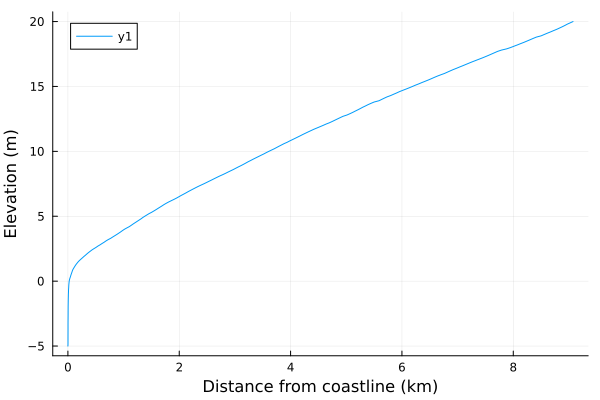

In [4]:
plot(london)

Get exposure of poeple and assets in this floodplain using a bathtub model

In [5]:
exposure_below_bathtub(london,5.0)

(108.09, Float32[], Float32[253533.53, 35214684160.00])

In [6]:
println("Exposed people below an elevation of 5 m: $(round(exposure_below_bathtub(london,5.0)[3][1], digits=0))")
println("Exposed assets below an elevation of 5 m: $(round(exposure_below_bathtub(london,5.0)[3][2]/1000000000, digits=1)) bil. US\$")

Exposed people below an elevation of 5 m: 253534.0
Exposed assets below an elevation of 5 m: 35.2 bil. US$


Get flood damage of assets under a 2 m flood using a standard depth-damage function (ddf) $ f(d)= \frac{d}{d+h}$ with parameter $h=1$ for water depth $d$

In [7]:
damage_bathtub_standard_ddf(london, 2.0, 0f0, [], [0f0,1f0])

(24.70, Float32[], Float32[11138.16, 408902976.00])

In [8]:
println("Flood damage of assets under a 2 m flood: $(round(damage_bathtub_standard_ddf(london, 2.0, 0f0, [], [0f0,1f0])[3][2]/1000000000,digits=1)) bil. US\$")

Flood damage of assets under a 2 m flood: 0.4 bil. US$


Exposure and damage for different water-levels

In [9]:
water_levels=(0.0:5.0)
for wl in water_levels
  expo_p = round(exposure_below_bathtub(london, wl)[3][1],digits=0)
  expo_a = round(exposure_below_bathtub(london, wl)[3][2]/1000000000,digits=1)
  dam  = round(damage_bathtub_standard_ddf(london, wl, 0f0, [], [0f0,1f0])[3][2]/1000000000,digits=1)
  println("waterlevel $wl m: \t  exposed people = $expo_p \t  exposed assets (bil. US\$) = $expo_a \t damage of assets (bil. US\$) = $dam")
end


waterlevel 0.00 m: 	  exposed people = 304.0 	  exposed assets (bil. US$) = 0.0 	 damage of assets (bil. US$) = 0.0
waterlevel 1.00 m: 	  exposed people = 1944.0 	  exposed assets (bil. US$) = 0.2 	 damage of assets (bil. US$) = 0.1
waterlevel 2.00 m: 	  exposed people = 11138.0 	  exposed assets (bil. US$) = 1.3 	 damage of assets (bil. US$) = 0.4
waterlevel 3.00 m: 	  exposed people = 51723.0 	  exposed assets (bil. US$) = 6.3 	 damage of assets (bil. US$) = 2.1
waterlevel 4.00 m: 	  exposed people = 141223.0 	  exposed assets (bil. US$) = 18.7 	 damage of assets (bil. US$) = 7.4
waterlevel 5.00 m: 	  exposed people = 253534.0 	  exposed assets (bil. US$) = 35.2 	 damage of assets (bil. US$) = 16.8


Plot the exposed people and flood damages for different water-levels

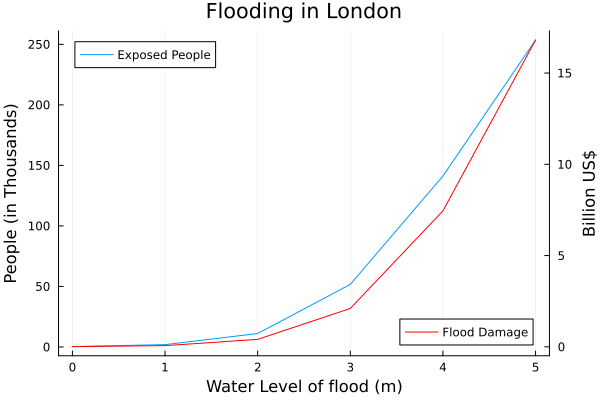

In [10]:
plot([water_levels], [exposure_below_bathtub(london, wl)[3][1]/1000 for wl in water_levels], 
    label="Exposed People", xlabel="Water Level of flood (m)", ylabel="People (in Thousands)", legend=:topleft, title="Flooding in London")
plot!(twinx(), [water_levels], [damage_bathtub_standard_ddf(london, wl, 0f0, [], [0f0,1f0])[3][2]/1000000000 for wl in water_levels], 
    label="Flood Damage", ylabel="Billion US\$", legend=:bottomright, color=:red)

Get annually expected flood damages in London, assuming extreme water levels are distributed according to a Generalized Pareto Distribution function with $\mu = 4.5, \sigma = 0.27$ and $\xi = 0.0 $

In [17]:
#do expected damages? but with what GEV/GPD function?

Get flood damage for all floodplains in the UK and IRL 

We define a helper function that does the accumulation over all hypsometric profiles: $ \sum_{hp \in hspfs} $ damage_bathtub_standard_ddf $ (hp,wl)$

In [12]:
function damage_sum_hspfs(hspfs, wl) 
    r = 0.0
    for (fpid, hp) in hspfs
      r += damage_bathtub_standard_ddf(hp, wl, 0f0, [], [0f0,1f0])[3][2]
    end
    return round(r/1000000000,digits=2)
  end  
  
  println("The total flood damage in the UK and Ireland under a 5 m flood is $(damage_sum_hspfs(hspfs, 5.0)) bil. US\$.")

The total flood damage in the UK and Ireland under a 5 m flood is 103.91 bil. US$.
